In [26]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [27]:
actions = [
    'fireBall',
    'thunderStorm',
    'ignition',
    'magicCasting',
    'UICall'
]

data = np.concatenate([
    np.load('dataset/seq_fireBall_1631086756.npy'),
    np.load('dataset/seq_thunderStorm_1631086756.npy'),
    np.load('dataset/seq_ignition_1631086756.npy'),
    np.load('dataset/seq_magicCasting_1631086756.npy'),
    np.load('dataset/seq_UICall_1631086756.npy')
], axis=0)

data.shape

(5803, 30, 100)

In [28]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(5803, 30, 99)
(5803,)


In [29]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(5803, 5)

In [30]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(5222, 30, 99) (5222, 5)
(581, 30, 99) (581, 5)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                41984     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 44,229
Trainable params: 44,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
164/164 [==============================] - 2s 10ms/step - loss: 36.5125 - acc: 0.2742 - val_loss: 12.1048 - val_acc: 0.3494

Epoch 00001: val_acc improved from -inf to 0.34940, saving model to models\model.h5
Epoch 2/200
164/164 [==============================] - 1s 9ms/step - loss: 7.8268 - acc: 0.4648 - val_loss: 4.9062 - val_acc: 0.4923

Epoch 00002: val_acc improved from 0.34940 to 0.49225, saving model to models\model.h5
Epoch 3/200
164/164 [==============================] - 1s 9ms/step - loss: 5.0988 - acc: 0.5040 - val_loss: 5.1019 - val_acc: 0.4578

Epoch 00003: val_acc did not improve from 0.49225
Epoch 4/200
164/164 [==============================] - 1s 9ms/step - loss: 5.4627 - acc: 0.4824 - val_loss: 4.6116 - val_acc: 0.4905

Epoch 00004: val_acc did not improve from 0.49225
Epoch 5/200
164/164 [==============================] - 1s 9ms/step - loss: 7.6020 - acc: 0.4401 - val_loss: 13.0983 - val_acc: 0.3907

Epoch 00005: val_acc did not improve from 0.49225
Epoch


Epoch 00042: val_acc did not improve from 0.83477
Epoch 43/200
164/164 [==============================] - 1s 9ms/step - loss: 1.0741 - acc: 0.6792 - val_loss: 1.4170 - val_acc: 0.6592

Epoch 00043: val_acc did not improve from 0.83477
Epoch 44/200
164/164 [==============================] - 1s 9ms/step - loss: 0.9936 - acc: 0.6951 - val_loss: 0.8490 - val_acc: 0.7367

Epoch 00044: val_acc did not improve from 0.83477
Epoch 45/200
164/164 [==============================] - 1s 9ms/step - loss: 1.1025 - acc: 0.6777 - val_loss: 1.2961 - val_acc: 0.6713

Epoch 00045: val_acc did not improve from 0.83477
Epoch 46/200
164/164 [==============================] - 1s 9ms/step - loss: 0.8913 - acc: 0.7135 - val_loss: 0.7742 - val_acc: 0.6781

Epoch 00046: val_acc did not improve from 0.83477
Epoch 47/200
164/164 [==============================] - 1s 9ms/step - loss: 1.2169 - acc: 0.6591 - val_loss: 1.7681 - val_acc: 0.5077

Epoch 00047: val_acc did not improve from 0.83477
Epoch 48/200
164/164 [==

164/164 [==============================] - 1s 8ms/step - loss: 1.0763 - acc: 0.5452 - val_loss: 1.0378 - val_acc: 0.5336

Epoch 00085: val_acc did not improve from 0.92427
Epoch 86/200
164/164 [==============================] - 1s 9ms/step - loss: 1.0453 - acc: 0.5561 - val_loss: 1.0267 - val_acc: 0.5353

Epoch 00086: val_acc did not improve from 0.92427
Epoch 87/200
164/164 [==============================] - 1s 9ms/step - loss: 1.0269 - acc: 0.5638 - val_loss: 1.0548 - val_acc: 0.5439

Epoch 00087: val_acc did not improve from 0.92427
Epoch 88/200
164/164 [==============================] - 1s 8ms/step - loss: 1.0190 - acc: 0.5653 - val_loss: 1.0155 - val_acc: 0.5146

Epoch 00088: val_acc did not improve from 0.92427
Epoch 89/200
164/164 [==============================] - 1s 8ms/step - loss: 0.9949 - acc: 0.5703 - val_loss: 0.9547 - val_acc: 0.5680

Epoch 00089: val_acc did not improve from 0.92427
Epoch 90/200
164/164 [==============================] - 1s 9ms/step - loss: 0.9714 - acc

164/164 [==============================] - 1s 8ms/step - loss: 0.3339 - acc: 0.8889 - val_loss: 0.3153 - val_acc: 0.9088

Epoch 00129: val_acc did not improve from 0.92427
Epoch 130/200
164/164 [==============================] - 1s 8ms/step - loss: 0.3150 - acc: 0.8968 - val_loss: 0.3319 - val_acc: 0.8778

Epoch 00130: val_acc did not improve from 0.92427
Epoch 131/200
164/164 [==============================] - 1s 9ms/step - loss: 0.3117 - acc: 0.8954 - val_loss: 0.3035 - val_acc: 0.9208

Epoch 00131: val_acc did not improve from 0.92427
Epoch 132/200
164/164 [==============================] - 1s 9ms/step - loss: 0.3203 - acc: 0.8997 - val_loss: 0.3452 - val_acc: 0.8744

Epoch 00132: val_acc did not improve from 0.92427
Epoch 133/200
164/164 [==============================] - 1s 9ms/step - loss: 0.2887 - acc: 0.9113 - val_loss: 0.2992 - val_acc: 0.9105

Epoch 00133: val_acc did not improve from 0.92427
Epoch 134/200
164/164 [==============================] - 1s 9ms/step - loss: 0.2828 


Epoch 00170: val_acc did not improve from 0.98967
Epoch 171/200
164/164 [==============================] - 1s 8ms/step - loss: 1.8375 - acc: 0.3698 - val_loss: 1.8305 - val_acc: 0.3546

Epoch 00171: val_acc did not improve from 0.98967
Epoch 172/200
164/164 [==============================] - 1s 9ms/step - loss: 1.7414 - acc: 0.3845 - val_loss: 1.6769 - val_acc: 0.3924

Epoch 00172: val_acc did not improve from 0.98967
Epoch 173/200
164/164 [==============================] - 1s 9ms/step - loss: 1.6975 - acc: 0.3966 - val_loss: 2.1383 - val_acc: 0.4045

Epoch 00173: val_acc did not improve from 0.98967
Epoch 174/200
164/164 [==============================] - 1s 9ms/step - loss: 1.6204 - acc: 0.4154 - val_loss: 2.4077 - val_acc: 0.3373

Epoch 00174: val_acc did not improve from 0.98967
Epoch 175/200
164/164 [==============================] - 1s 9ms/step - loss: 9.7026 - acc: 0.2292 - val_loss: 2.4677 - val_acc: 0.1997

Epoch 00175: val_acc did not improve from 0.98967
Epoch 176/200
164/1

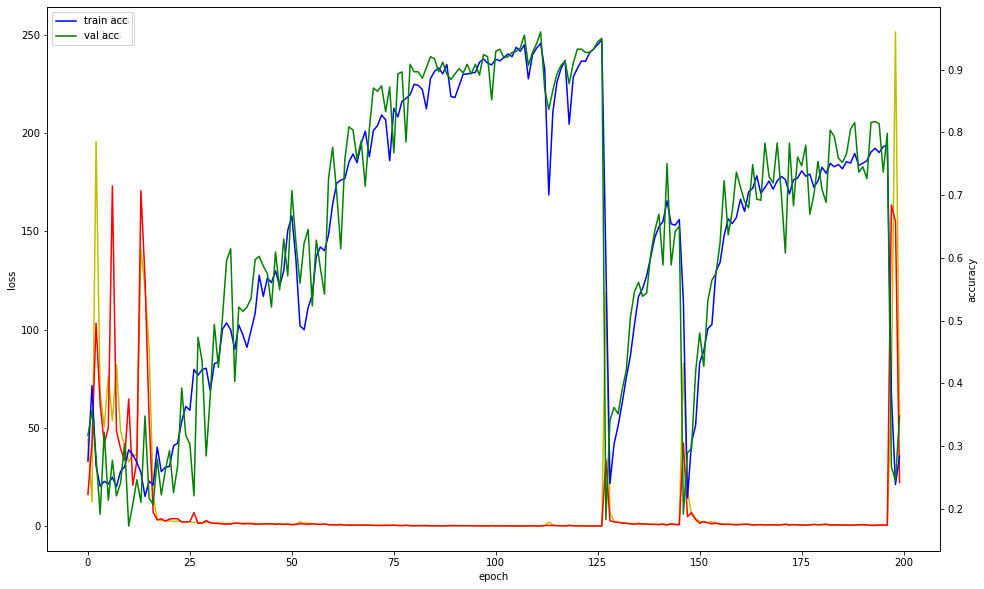

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[455,   2],
        [  0, 124]],

       [[457,   5],
        [  6, 113]],

       [[450,   5],
        [  2, 124]],

       [[473,   4],
        [  6,  98]],

       [[466,   7],
        [  9,  99]]], dtype=int64)